## **Classical Machine learning models such as Naive bayes, SVM, Decision tree etc.**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DATASET_DA/train.csv')  

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['label'], test_size=0.2, random_state=42)

In [ ]:
# Text vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


In [ ]:
# Transform the word counts to TF-IDF representation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [ ]:
# Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)

print("Naive Bayes Classifier:")
print(classification_report(y_test, nb_predictions))
print("Accuracy:", accuracy_score(y_test, nb_predictions))

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5937
           1       1.00      0.13      0.23       456

    accuracy                           0.94      6393
   macro avg       0.97      0.56      0.60      6393
weighted avg       0.94      0.94      0.91      6393

Accuracy: 0.9379008290317535


In [ ]:
# SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)

print("SVM Classifier:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))


SVM Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5937
           1       0.95      0.42      0.58       456

    accuracy                           0.96      6393
   macro avg       0.96      0.71      0.78      6393
weighted avg       0.96      0.96      0.95      6393

Accuracy: 0.9571406225559206


In [ ]:
# Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_tfidf, y_train)
dt_predictions = dt_classifier.predict(X_test_tfidf)

print("Decision Tree Classifier:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5937
           1       0.63      0.57      0.60       456

    accuracy                           0.95      6393
   macro avg       0.80      0.77      0.78      6393
weighted avg       0.94      0.95      0.94      6393

Accuracy: 0.9454090411387455


In [ ]:
from sklearn.metrics import classification_report



In [ ]:
classifiers = ['Naive Bayes', 'SVM', 'Decision Tree']
reports = [classification_report(y_test, nb_predictions),
           classification_report(y_test, svm_predictions),
           classification_report(y_test, dt_predictions)]

In [ ]:
# Initialize arrays to store precision, recall, and F1-score values
precision = np.zeros((len(classifiers), len(set(y_test))), dtype=float)
recall = np.zeros((len(classifiers), len(set(y_test))), dtype=float)
f1_score = np.zeros((len(classifiers), len(set(y_test))), dtype=float)

In [ ]:
# Parse the classification reports and store the scores
for i, report in enumerate(reports):
    report_lines = report.split('\n')[2:-5]
    for j, line in enumerate(report_lines):
        line_parts = line.split()
        if len(line_parts) == 5:
            precision[i, j] = float(line_parts[1])
            recall[i, j] = float(line_parts[2])
            f1_score[i, j] = float(line_parts[3])

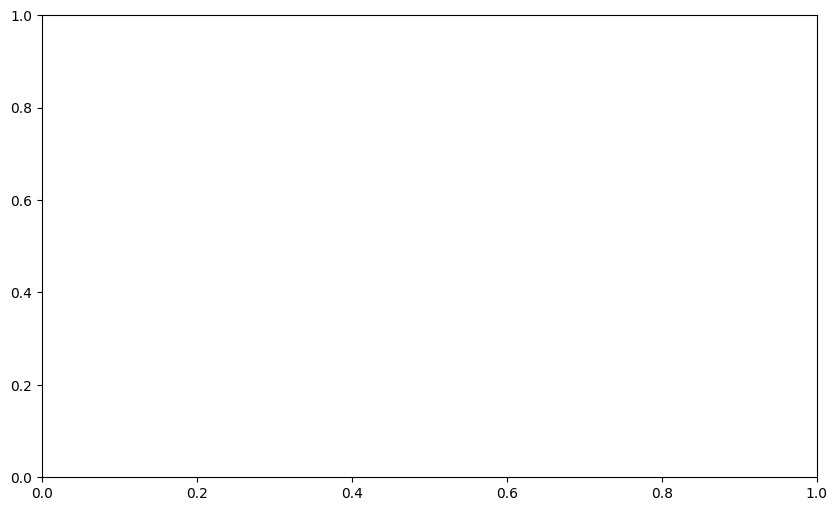

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.8
index = np.arange(len(classifiers))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

In [ ]:
# Plot precision, recall, and F1-score for each class and each classifier
for i in range(len(set(y_test))):
    bar_offset = i * bar_width
    ax.bar(index + bar_offset, precision[:, i], bar_width, label=f'Class {i+1} - Precision', color=colors[i])
    ax.bar(index + bar_offset + bar_width, recall[:, i], bar_width, label=f'Class {i+1} - Recall', color=colors[i], alpha=0.5)
    ax.bar(index + bar_offset + 2 * bar_width, f1_score[:, i], bar_width, label=f'Class {i+1} - F1-Score', color=colors[i], alpha=0.8)


In [ ]:
# Configure the plot
ax.set_xlabel('Classifier')
ax.set_ylabel('Score')
ax.set_title('Classification Report')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classifiers)
ax.legend(loc='lower right')
ax.grid(True)

plt.show()

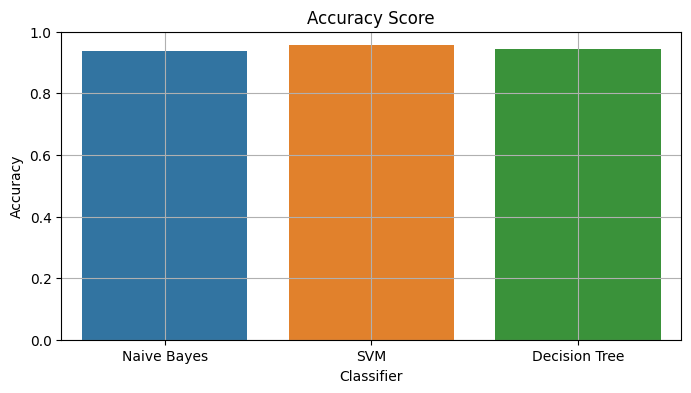

In [ ]:
# Accuracy score visualization
accuracies = [accuracy_score(y_test, nb_predictions),
              accuracy_score(y_test, svm_predictions),
              accuracy_score(y_test, dt_predictions)]

plt.figure(figsize=(8, 4))
sns.barplot(x=classifiers, y=accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Score')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

## **2. BI-LSTM with word2vec/ faatext word embedding.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import plot_model
from gensim.models import Word2Vec, FastText

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DATASET_DA/train.csv')  

In [ ]:
# Convert labels to the appropriate data type
data['label'] = data['label'].astype(int)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['label'], test_size=0.2, random_state=42)


In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Pad sequences to ensure consistent length
max_sequence_length = max([len(sequence) for sequence in X_train_sequences])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)


In [ ]:
# Word Embedding - Word2Vec
word2vec_model = Word2Vec(sentences=X_train_sequences, vector_size=100, min_count=1)
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv.key_to_index:
        embedding_matrix[i] = word2vec_model.wv[word]

In [ ]:
# Word Embedding - FastText
fasttext_model = FastText(sentences=X_train_sequences, vector_size=100, min_count=1)
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in fasttext_model.wv.key_to_index:
        embedding_matrix[i] = fasttext_model.wv[word]


In [ ]:
# Define the BI-LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train_padded, y_train.astype(float), validation_data=(X_test_padded, y_test.astype(float)), epochs=10, batch_size=64)

Epoch 1/10
400/400 [==============================] - 30s 69ms/step - loss: 0.2657 - accuracy: 0.9301 - val_loss: 0.2574 - val_accuracy: 0.9287
Epoch 2/10
400/400 [==============================] - 29s 72ms/step - loss: 0.2542 - accuracy: 0.9301 - val_loss: 0.2578 - val_accuracy: 0.9287
Epoch 3/10
400/400 [==============================] - 28s 70ms/step - loss: 0.2542 - accuracy: 0.9301 - val_loss: 0.2573 - val_accuracy: 0.9287
Epoch 4/10
400/400 [==============================] - 26s 66ms/step - loss: 0.2537 - accuracy: 0.9301 - val_loss: 0.2582 - val_accuracy: 0.9287
Epoch 5/10
400/400 [==============================] - 33s 83ms/step - loss: 0.2539 - accuracy: 0.9301 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 6/10
400/400 [==============================] - 27s 68ms/step - loss: 0.2538 - accuracy: 0.9301 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 7/10
400/400 [==============================] - 35s 87ms/step - loss: 0.2539 - accuracy: 0.9301 - val_loss: 0.2574 - val_accuracy:

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test.astype(float), verbose=0)
print("Accuracy:", accuracy)


Accuracy: 0.9286719560623169


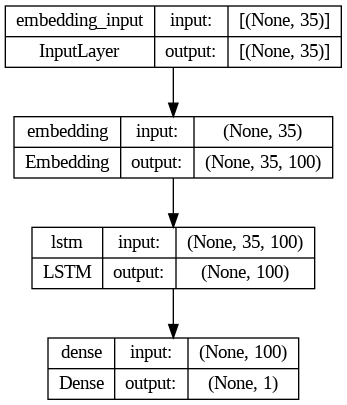

In [ ]:
#plot
plot_model(model, to_file='model.png', show_shapes=True)

## **3) Transformer based model with BERT-based word embedding.**

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DATASET_DA/customer_review.csv')

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Tokenize the text and determine the maximum sequence length
X_train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
X_test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)
max_length = max(max(len(x) for x in X_train_encodings['input_ids']), max(len(x) for x in X_test_encodings['input_ids']))

In [ ]:
# Re-tokenize with adjusted max_length
X_train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=max_length)
X_test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=max_length)


In [ ]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_1': X_train_encodings['input_ids'],
        'input_2': X_train_encodings['attention_mask'],
    },
    y_train.astype(float)
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_1': X_test_encodings['input_ids'],
        'input_2': X_test_encodings['attention_mask'],
    },
    y_test.astype(float)
))


In [ ]:
# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Build the transformer-based model
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_1')
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_2')
embedding_layer = bert_model(input_ids, attention_mask=attention_mask)[0]
output_layer = tf.keras.layers.GlobalAveragePooling1D()(embedding_layer)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(output_layer)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output_layer)

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_dataset.shuffle(1000).batch(16),
          epochs=3,
          batch_size=16,
          validation_data=test_dataset.shuffle(1000).batch(16))

Epoch 1/3


2/2 [==============================] - 55s 10s/step - loss: 0.7007 - accuracy: 0.5806 - val_loss: 0.7892 - val_accuracy: 0.2500
Epoch 2/3
2/2 [==============================] - 10s 5s/step - loss: 0.6254 - accuracy: 0.6774 - val_loss: 0.8343 - val_accuracy: 0.3750
Epoch 3/3
2/2 [==============================] - 10s 6s/step - loss: 0.5906 - accuracy: 0.7097 - val_loss: 0.8392 - val_accuracy: 0.5000


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_dataset.batch(16), verbose=0)
print("Accuracy:", accuracy)

Accuracy: 0.5


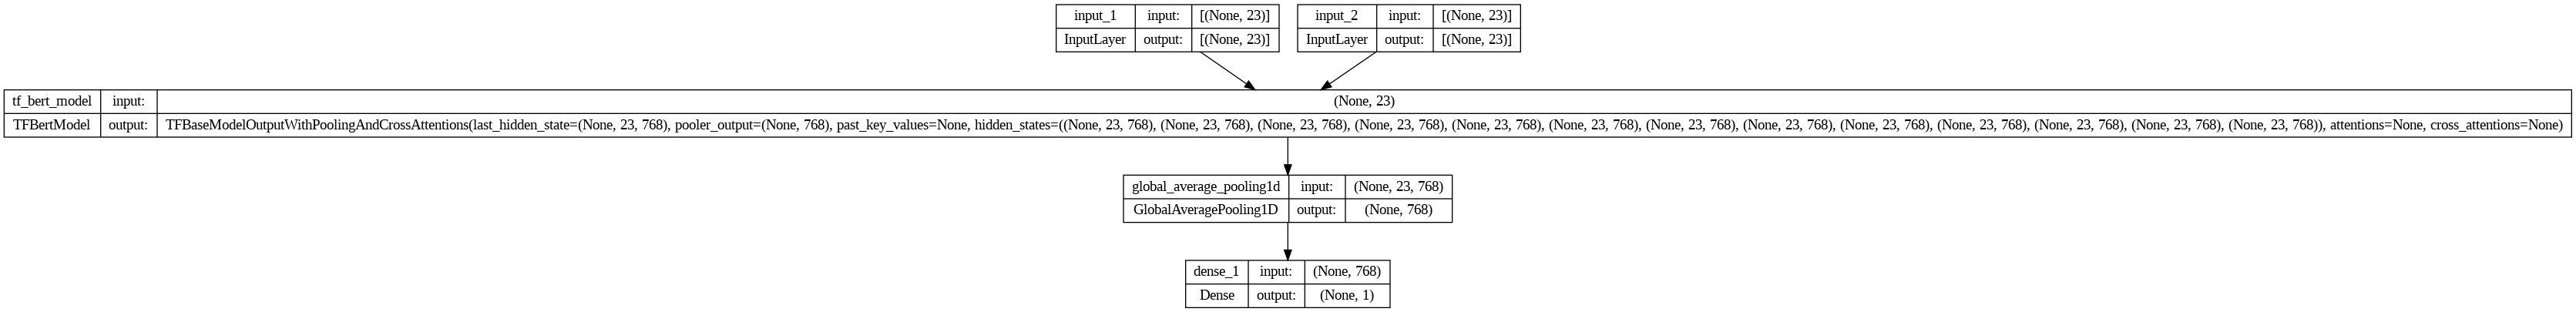

In [ ]:
#plot
plot_model(model, to_file='model.png', show_shapes=True)